# **Regression Model to Predict Average Price per Kilogram**
-----------------

<br>
<img src="https://cdn.shopify.com/s/files/1/0271/7823/8041/products/golden-delicious-apple_2048x2048.jpg" alt="Golden Delicious Apples" title="Golden Delicious Apples" />
<br>


## **Contents**
-----------------
- Import Packages
  - numpy for mathemticial calculations
  - pandas to read and store data as Data Frames
  - matplotlib and seaborn for visualisations
  - scikit learn for Regression Modeling, Model Selection, Pre-processing and Metrics
  - xgboost for Regression Modeling
- Import Data
  - Importing train and test datasets
- Pre-processing
  - Checking for missing or null values
  - Change Date column into Day and Month columns
  - Filter data
- Exploratory Data Analysis
  - Univariate Analysis
  - Multivariate Analysis
- Model Building
  - Linear Regression
  - Lasso Regression
  - Ridge Regression
  - XGBoost
- Predict Deployment
- Conclusion

## **Introduction**
--------------------
The task is to predict the average price per kilogram for **Golden Delicious Apples**.
<br>
Providing an accurate and robust solution for users to be able to accurately determine what price to set the **Golden Delicious Apples** to, using a set of features (Weight, Low Price, High Price, etc.).

## **Import Packages**
---------------
Importing:
- numpy for mathemticial calculations
- pandas to read and store data as Data Frames
- matplotlib and seaborn for visualisations
- scikit learn for Regression Modeling, Model Selection, Pre-processing and Metrics
- xgboost for Regression Modeling

In [1]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Extra Modules
from xgboost import XGBRegressor

## **Importing Data**
-------------

In [53]:
train = pd.read_csv('df-train_set.csv')
test = pd.read_csv('df-test_set.csv')

## **Pre-processing**
------------

Firstly, we take a quick look at the data from our training set

In [4]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [61]:
train.shape

(64376, 13)

The data frame has 64376 rows and 13 columns

### **Checking for missing or null values**
------------
Using the `info()` method to display what data type and the number of rows with each column. If the number of rows in each column differs from the total then that column has missing or null values.

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


Results show that none of the columns contains null or missing values. 

### **Change Date column into Day and Month columns**
---------------
Our **train** DataFrame only contains data for a single calendar year therefore the year is irrelevant (we only need the month and day to observe changes over time). 
<br><br>
Firstly, we will assign the **Date** column a datetime data type, seeing that it has an object data type. Afterwards we will extract the Day and Month, and assign them to two new columns **Day** and **Month** using the `dt.day` and `dt.month` attributes respectively.

In [64]:
train['Date'] = pd.to_datetime(train['Date'])
train['Day'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train.drop(['Date'], inplace = True, axis = 1)

### **Filter Data**
--------------------
The goal is to predict `avg_price_per_kg` for **Golden Delicious Apples**, therefore we need to filter our DataFrame to only contain data for **Golden Delicious Apples**.
<br><br>
Knowing that the DataFrame now only contains data for **Golden Delicious Apples**, the **Commodities** column can be removed.

In [65]:
train = train.query('Commodities == "APPLE GOLDEN DELICIOUS"')

"""
    * Set the parameter 'inplace' to True, or the column won't be completely removed
    * Set the parameter 'axis' to 1, to remove the feature by column and not index
"""
train.drop(['Commodities'], inplace = True, axis = 1)
train.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9


##### Everything looks good, now the dataset is ready to be explored 

## Exploratory Data Analysis
-------------

###  **Univariate Analysis**
--------------

#### **Statistical Overview**

Firstly, we will take a brief overview of a summary of each numeric feature by using the `describe()` method.

In [9]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,15.866291,5.609119
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,8.705740,2.687248
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,1.000000,1.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,9.000000,3.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,16.000000,6.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,23.000000,7.000000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,31.000000,12.000000


##### **Skewness and Kurtosis**
----------
Below we will be calculating the **kurtosis** and **skew** to measure the presents of outliers and the skewness of our data respectively.
<br>
- If the skewness is between -0.5 and 0.5, the data is fairly symmetrical.
- If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data is moderately skewed.
- If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data is highly skewed

<br>
<img src = "https://miro.medium.com/max/600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg" alt = "Skewness" title = "Skewness"></img>
<br>

In [10]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
Day                -0.021883
Month               0.078651
dtype: float64

The feature `Day`, `avg_price_per_kg` and `Month` is fairly symmetrical; `Weight_Kg`, `Low_Price`, `High_Price`, `Sales_total`, `Total_Qty_Sold`, `Total_Kg_Sold` and `Stock_On_Hand` are highly skewed in the positive direction.

In [11]:
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
Day                 -1.122178
Month               -0.620111
dtype: float64

Kurtosis indicates that `Weight_Kg`, `Low_Price`, `High_Price`, `Sales_total`, `Total_Qty_Sold`, `Total_Kg_Sold` and `Stock_On_Hand` has a fairly high measure of outliers present. While `Day`, `avg_price_per_kg` and `Month` indicates a lack of outliers.

#### **Visualisation Overview**

##### **Visualisation of all numeric features**

In [66]:
#Style for all plots
sns.set_style("dark")

In [67]:
# Scale features so that they can fit on the same axes
scale_graph = StandardScaler()
num_feat = train[['Weight_Kg', 
                 'Low_Price', 
                 'High_Price', 
                 'Sales_Total', 
                 'Total_Qty_Sold', 
                 'Total_Kg_Sold', 
                 'Stock_On_Hand', 
                 'avg_price_per_kg', 
                 'Day', 
                 'Month']]
x_axes = scale_graph.fit_transform(num_feat)

In [68]:
# Using the Scaled Data to make a DataFrame to maintain naming convention
scaled_df = pd.DataFrame(x_axes, columns = num_feat.columns)

##### **Bar Plot of all numeric predictors**

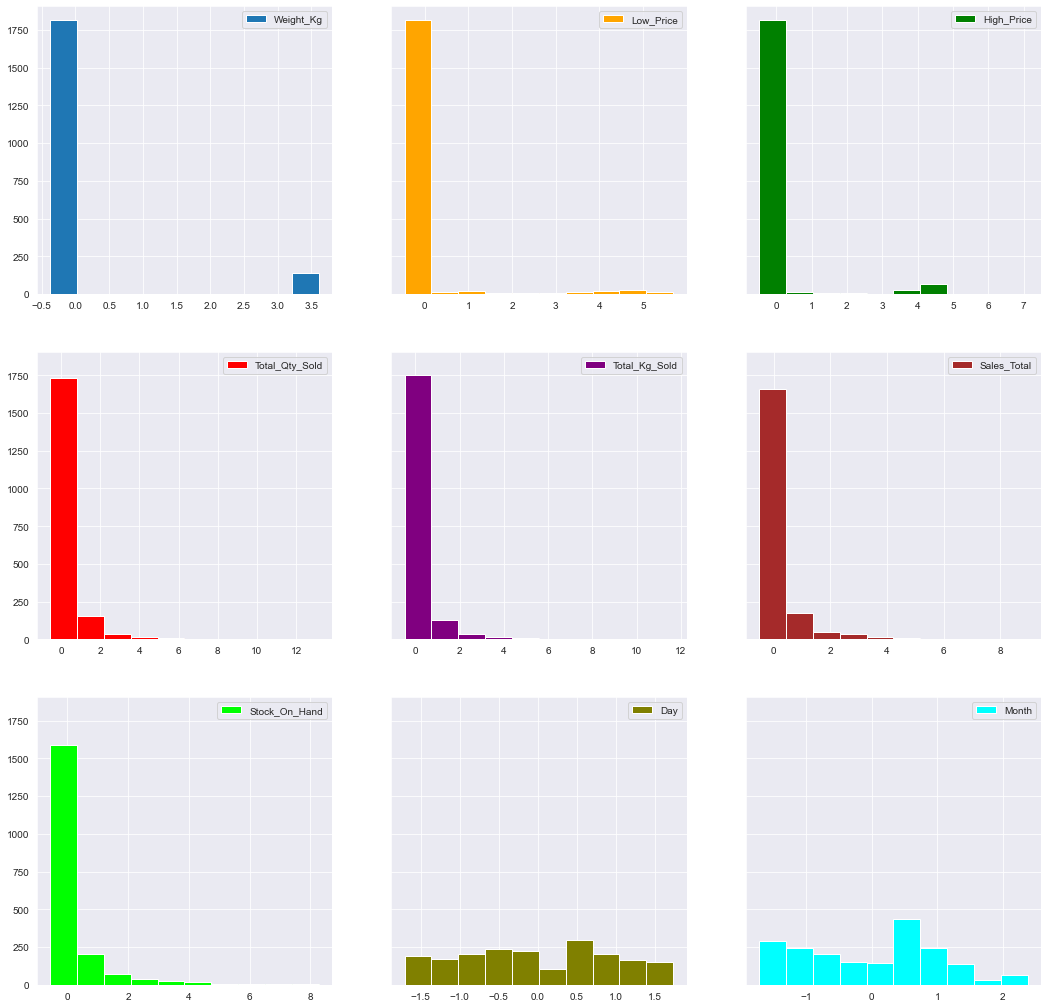

In [244]:
fig, ax = plt.subplots(3, 3, figsize = (18, 18), sharey = True)
scaled_df['Weight_Kg'].hist(ax = ax[0, 0], legend = True)
scaled_df['Low_Price'].hist(ax = ax[0, 1], color = 'orange', legend = True)
scaled_df['High_Price'].hist(ax = ax[0, 2], color = 'green', legend = True)
scaled_df['Total_Qty_Sold'].hist(ax = ax[1, 0], color = 'red', legend = True)
scaled_df['Total_Kg_Sold'].hist(ax = ax[1, 1], color = 'purple', legend = True)
scaled_df['Sales_Total'].hist(ax = ax[1, 2], color = 'brown', legend = True)
scaled_df['Stock_On_Hand'].hist(ax = ax[2, 0], color = 'lime', legend = True)
scaled_df['Day'].hist(ax = ax[2, 1], color = 'olive', legend = True)
scaled_df['Month'].hist(ax = ax[2, 2], color = 'cyan', legend = True)
plt.savefig('hist.png')

##### **Density Plot of all numeric predictors**

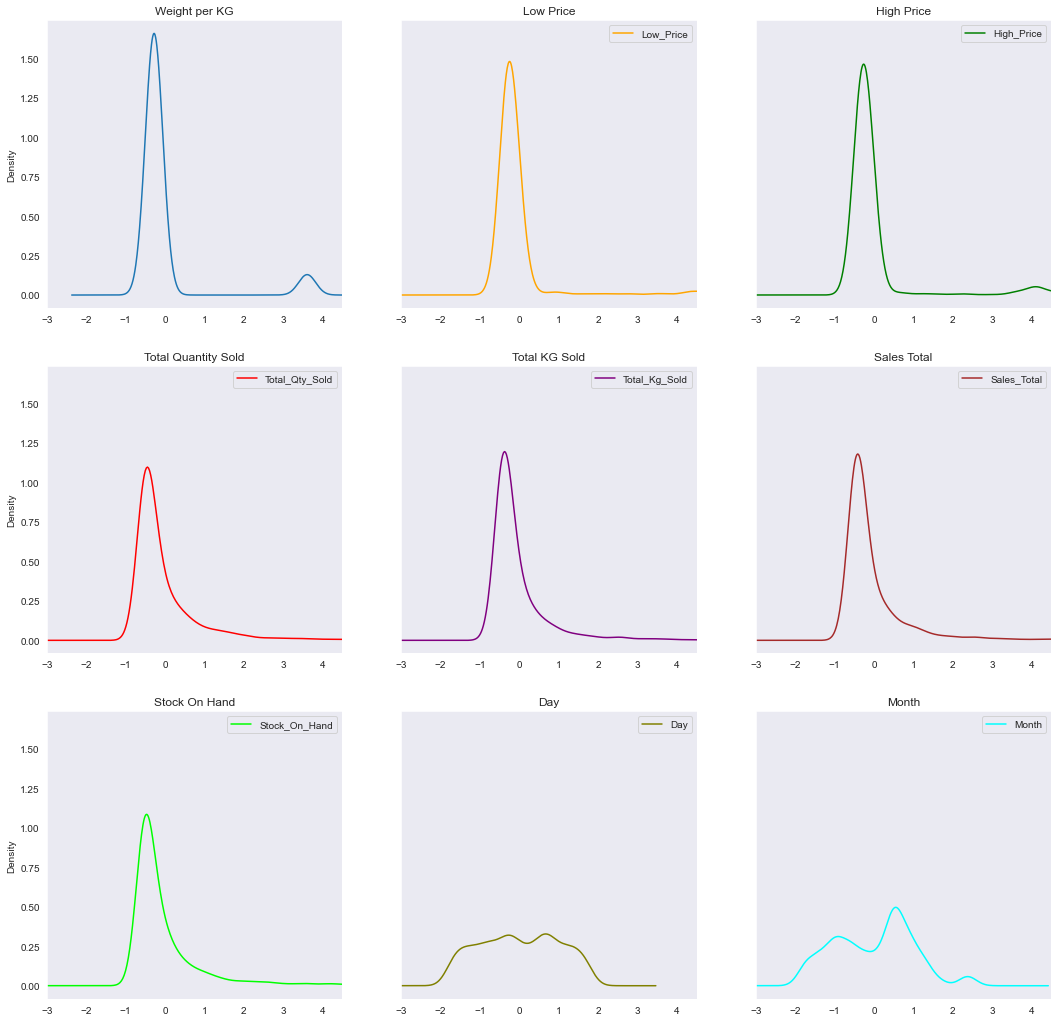

In [47]:
sns.set_style("dark")
x_limit = (-3, 4.5) # x axis range for all plots

fig, ax = plt.subplots(3, 3, figsize = (18, 18), sharey = True)
scaled_df['Weight_Kg'].plot(kind = 'density', ax = ax[0, 0], title = 'Weight per KG', xlim = x_limit)
scaled_df['Low_Price'].plot(kind = 'density', ax = ax[0, 1], color = 'orange', title = 'Low Price', legend = True, xlim = x_limit)
scaled_df['High_Price'].plot(kind = 'density', ax = ax[0, 2], color = 'green', title = 'High Price', legend = True, xlim = x_limit)
scaled_df['Total_Qty_Sold'].plot(kind = 'density', ax = ax[1, 0], color = 'red', title = 'Total Quantity Sold', legend = True, xlim = x_limit)
scaled_df['Total_Kg_Sold'].plot(kind = 'density', ax = ax[1, 1], color = 'purple', title = 'Total KG Sold', legend = True, xlim = x_limit)
scaled_df['Sales_Total'].plot(kind = 'density', ax = ax[1, 2], color = 'brown', title = 'Sales Total', legend = True, xlim = x_limit)
scaled_df['Stock_On_Hand'].plot(kind = 'density', ax = ax[2, 0], color = 'lime', title = 'Stock On Hand', legend = True, xlim = x_limit)
scaled_df['Day'].plot(kind = 'density', ax = ax[2, 1], color = 'olive', title = 'Day', legend = True, xlim = x_limit)
scaled_df['Month'].plot(kind = 'density', ax = ax[2, 2], color = 'cyan', title = 'Month', legend = True, xlim = x_limit)
plt.savefig('Density.png')

##### **Density Plot  >>  Bar Plot  >>  Box Plot of target variable (Average Price per KG)**

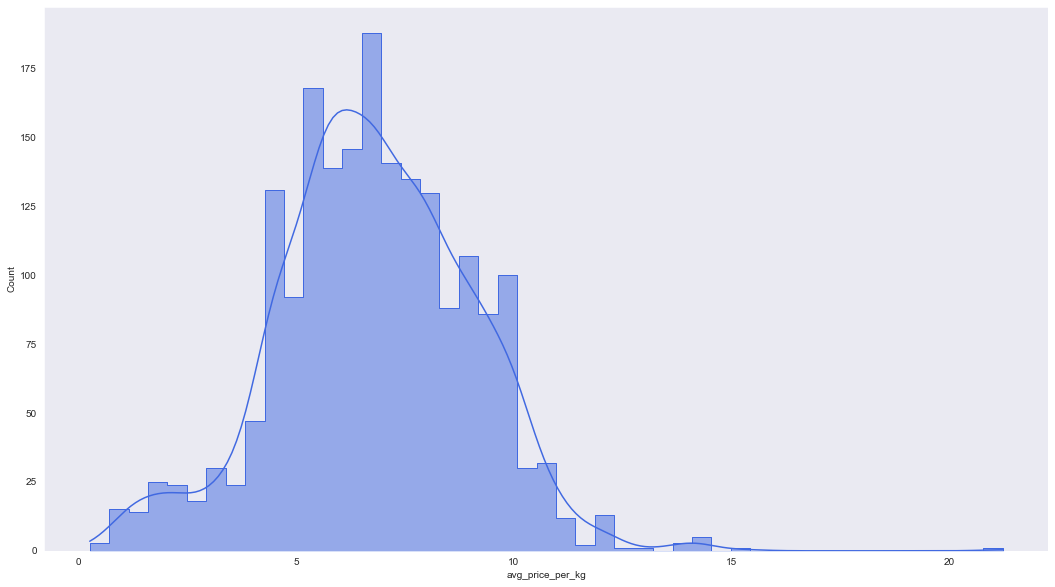

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (18, 10))
sns.histplot(data = train, x = 'avg_price_per_kg', ax = ax, kde = True, color = 'royalblue', element = 'step')
# scaled_df.boxplot(column = ['avg_price_per_kg'], ax = ax[2], color = 'gold')
plt.savefig('Target_Variable.png')

##### **As shown in the kurtosis, there are 7 features with outliers that lies far outside the range. Below is a graphical presentation of how far they actually are**

<AxesSubplot:>

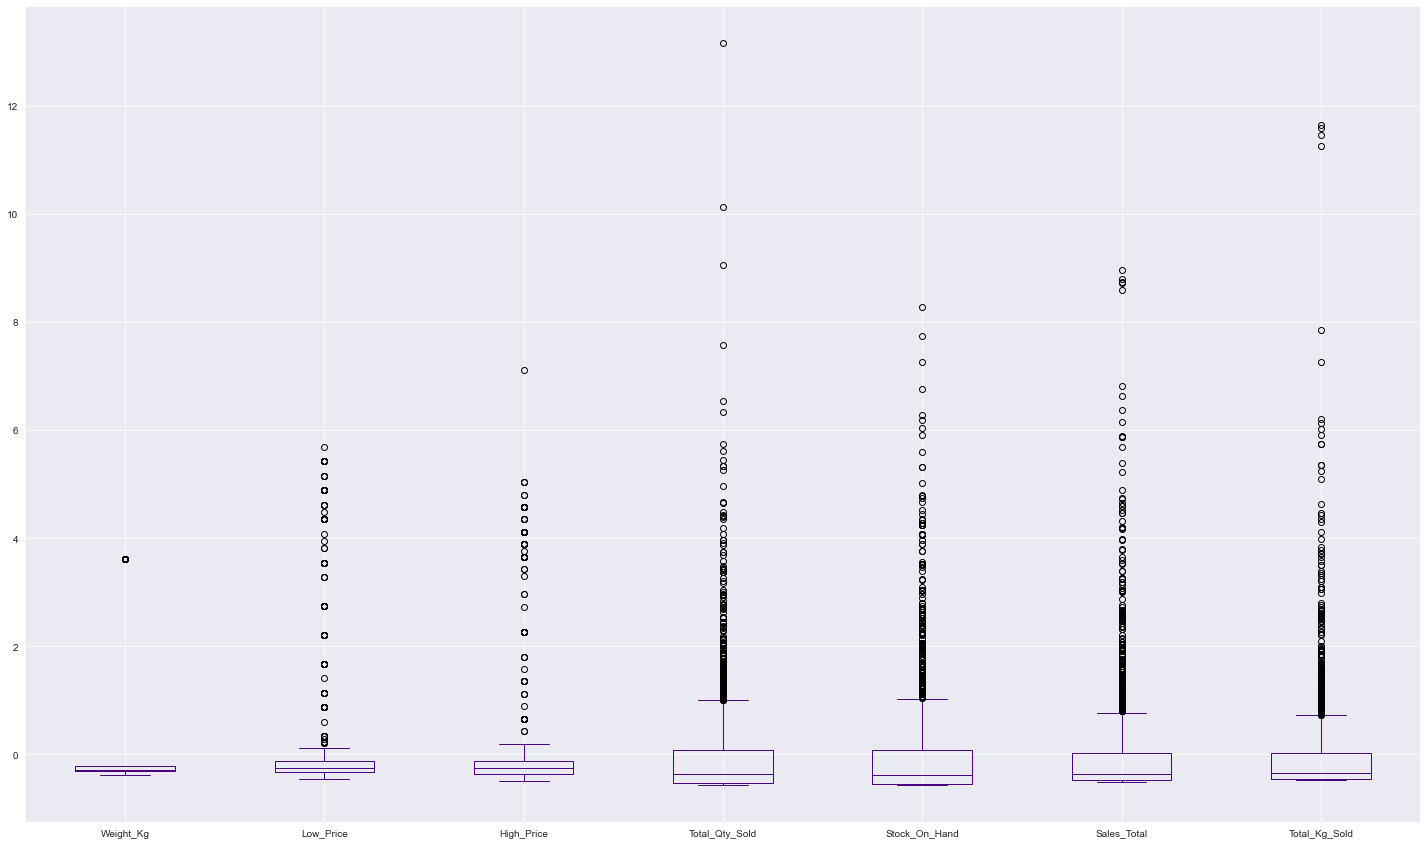

In [19]:
scaled_df.boxplot(column = ['Weight_Kg', 'Low_Price', 'High_Price', 'Total_Qty_Sold', 'Stock_On_Hand', 'Sales_Total', 'Total_Kg_Sold'], 
                  color = 'indigo',
                 figsize = (25, 15))

##### **Next we will be looking at plots for all categorical features**

In [22]:
# Getting the count per category and their labels to display in a bar plot
province_values = train.groupby('Province')['Province'].count()
province_keys = list(province_values.index)

container_values = train.groupby('Container')['Container'].count()
container_keys = list(container_values.index)

size_grade_values = train.groupby('Size_Grade')['Size_Grade'].count()
size_grade_keys = list(size_grade_values.index)

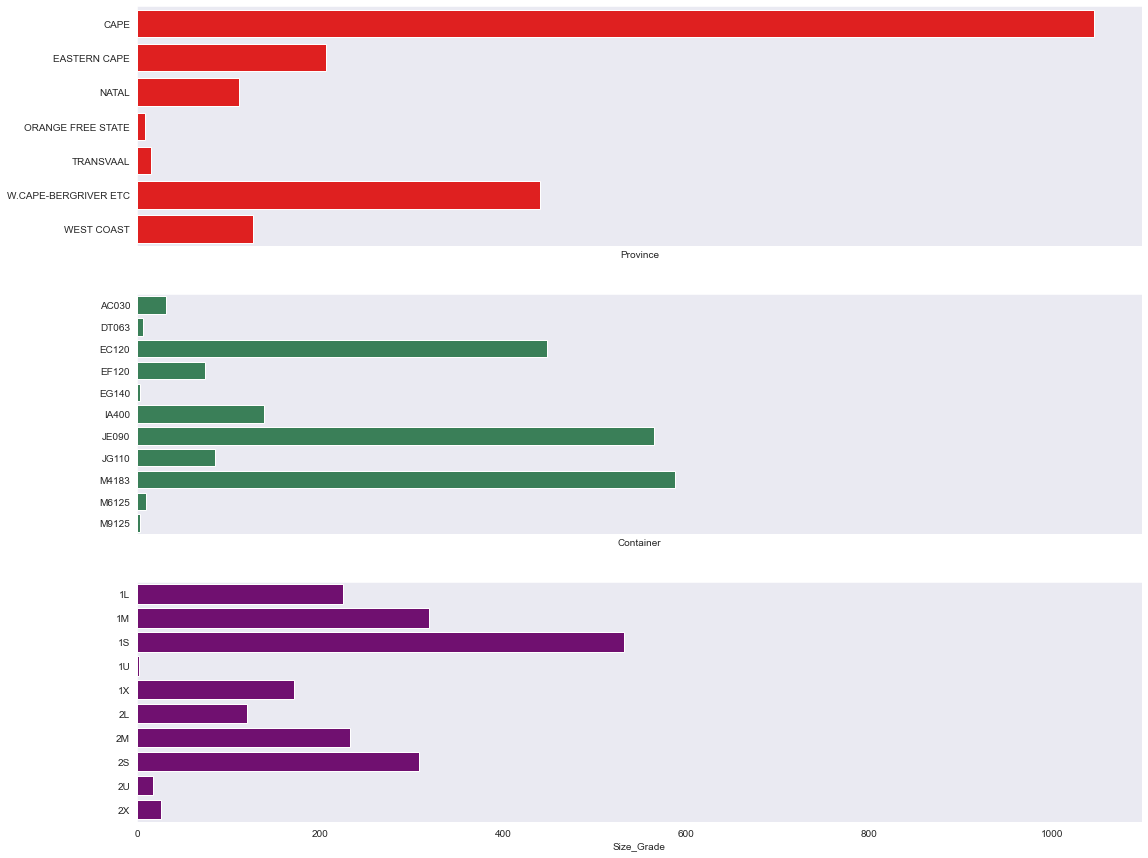

In [247]:
fig, ax = plt.subplots(3, 1, figsize = (18, 15), sharex = True)
sns.barplot(x = province_values, y = province_keys, ax = ax[0], color = 'red')
sns.barplot(x = container_values, y = container_keys, ax = ax[1], color = 'seagreen')
sns.barplot(x = size_grade_values, y = size_grade_keys, ax = ax[2], color = 'purple')
plt.savefig('Bar.png')

### **Multivariate Analysis**
----------------------------

#### **Statistical Overview**

We use the `get_dummies()` method to transform our categorical data into numeric data by adding additional columns that represents each distinct category.

Below a `True` argument was passed into the `drop_first` parameter to create n - 1 categories for n categorical features.

In [47]:
df_train = pd.get_dummies(data = train, columns = ['Province', 'Container', 'Size_Grade'], drop_first = True)
df_train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,...,0,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,...,0,0,0,0,0,0,1,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4,...,0,0,0,0,0,0,0,1,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,...,0,0,1,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9,...,0,0,1,0,0,0,0,0,0,0


##### **Using the Pearson correlation measure the relationship between features**

In [213]:
df_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.016251,0.047613,...,-0.011011,-0.046532,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,-0.015764,0.039084,...,-0.009207,-0.023629,0.288148,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.002058,0.047717,...,-0.011222,-0.039365,0.331683,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.011699,-0.055853,...,-0.012063,-0.057071,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.020402,-0.058639,...,-0.010528,-0.061837,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,0.003238,-0.023098,...,-0.011677,-0.076261,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,0.081923,-0.011749,...,-0.022123,-0.028461,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.071334,0.005205,...,0.002812,0.175779,-0.028506,-0.027335,0.251451,-0.089733,-0.153372,-0.352996,-0.069457,-0.051624
Day,0.016251,-0.015764,0.002058,-0.011699,-0.020402,0.003238,0.081923,-0.071334,1.000000,0.010012,...,-0.011418,-0.001329,0.028307,0.009691,-0.030633,0.014469,-0.029280,0.035713,0.019178,-0.026454
Month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,0.010012,1.000000,...,-0.018631,-0.023882,0.035952,-0.007261,-0.064184,0.067404,0.012777,-0.022811,-0.047931,0.013578


## **Model Building**
------------

In [48]:
# Defining Functions for ease of quick calculations
def r_squared(y, y_pred):
    return r2_score(y, y_pred)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def mse(y, y_pred):
    return mean_squared_error(y, y_pred)

#### **Splitting data into x and y variables for the predictors and target, respectively**

In [49]:
x = df_train.drop(['avg_price_per_kg'], axis = 1)
y = df_train['avg_price_per_kg']

### **Linear Regression**
-----------------
Using **Linear Regression** to model the relationship between the independent variable(s) and dependent variable by fitting a linear equation to the observed data.
<br><center>Simple Linear Regression</center>
## $$Y_{i} = \beta_{0} + \beta_{1}X_{i}$$
<center>Multiple Linear Regression</center>

##  $$Y_{i} = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{p}X_{p}$$
<br>

##### **Initializing an instance of the `LinearRegression()` class, standardizing the data, splitting the data into 80% train and 20% test and fitting it to the model**

In [50]:
lr = LinearRegression()

In [51]:
lr_scaler = StandardScaler()
x_scale = lr_scaler.fit_transform(x)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, 
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 1)

In [53]:
lr.fit(x_train, y_train)

LinearRegression()

##### **Intercept of the Linear Model**

In [54]:
intercept_lr = float(lr.intercept_)
intercept_lr

6.803130684377324

##### **Coefficients of all predictors**

In [55]:
df_lr_coef = pd.DataFrame(lr.coef_, x.columns, columns = ['Coefficients'])
df_lr_coef

,Coefficients
Weight_Kg,-6.663413e+12
Low_Price,2.080163e-01
High_Price,6.156301e-01
Sales_Total,2.764197e+00
Total_Qty_Sold,-7.007100e-01
Total_Kg_Sold,-2.221110e+00
Stock_On_Hand,-8.849392e-02
Day,-4.325434e-02
Month,1.569140e-01
Province_EASTERN CAPE,-4.614018e-01


##### **Prediction on the X_train and X_test sets**

In [56]:
lr_train_y_pred = lr.predict(x_train)
lr_test_y_pred = lr.predict(x_test)

### **Lasso Regression**
--------------
Lasso is a type of linear regression that uses shrinkage where data values are shrunk towards a central point, like the mean. This encourages **sparse models**.

Lasso performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. Which implies that some coefficients can be shrunk to zero and eliminated from the model. λ
<br>
## $$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^p|b_j| = RSS + \alpha\sum_{j=1}^p|b_j|$$
<br>

##### **Initializing an instance of the `StandardScaler()` class, fitting to data then transforming it and splitting data into 80% train and 20% test using the scaled data**

In [57]:
# Initializing an instance of the StandardScaler() class
scalar = StandardScaler()

In [58]:
# Fitting to data then transforming it 
x_scaled = scalar.fit_transform(x)

In [59]:
# Setting shuffle to False to prevent shuffling before the data splits.
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scaled,
                                                       y,
                                                       test_size = 0.20,
                                                       random_state = 1,
                                                       shuffle = False)

##### **Initislizing an instance of the `Lasso()` class and fitting the data to the model**

In [60]:
# Setting hyperparameter "alpha" to 0.01 but it can be tuned over time.
lasso = Lasso(alpha = 0.01)

In [61]:
lasso.fit(x_train2, y_train2)

Lasso(alpha=0.01)

##### **Intercept of the Lasso Model**

In [62]:
lasso_intercept = float(lasso.intercept_)
lasso_intercept

6.80259256137762

##### **Coefficient of all predictors**

In [63]:
lasso_coeff = pd.DataFrame(lasso.coef_, x.columns, columns=['Coefficient'])
lasso_coeff

,Coefficient
Weight_Kg,-0.000000
Low_Price,0.219897
High_Price,0.580265
Sales_Total,2.216910
Total_Qty_Sold,-0.552307
Total_Kg_Sold,-1.742575
Stock_On_Hand,-0.054556
Day,-0.069396
Month,0.137537
Province_EASTERN CAPE,-0.425427


##### **Prediction on the X_train and X_test sets**

In [64]:
lasso_y_pred_train = lasso.predict(x_train2)
lasso_y_pred_test = lasso.predict(x_test2)

### **Ridge Regression**
-----------
Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables)

Ridge regression uses L2 Regulaization. Which adds an L2 penalty, which equals the square of the magnitude of coefficients.
<br>
## $$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^pb_j^2 = RSS + \alpha\sum_{j=1}^pb_j^2$$
<br>

##### **Initializing an instance of the `StandardScaler()` class, fitting and transforming the data, and splitting the data into 80% train and 20% test**

In [65]:
ridge_scalar = StandardScaler()

In [66]:
ridge_x_scaled = ridge_scalar.fit_transform(x)

In [67]:
# Split data into 80% train and 20% test
x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge = train_test_split(ridge_x_scaled, 
                                                                            y, 
                                                                            test_size=0.2, 
                                                                            random_state = 1)

##### **Initializing an instance of the `Ridge()` class and fitting the data to the model**

In [68]:
ridge = Ridge()

In [69]:
ridge.fit(x_train_ridge, y_train_ridge)

Ridge()

##### **Intercept of the Ridge Model**

In [70]:
ridge_intercept = float(ridge.intercept_)
print("Intercept:", float(ridge_intercept))

Intercept: 6.802440142202827


##### **Coefficients of all predictors**

In [71]:
coeff = pd.DataFrame(ridge.coef_, x.columns, columns=['Coefficient'])
coeff

,Coefficient
Weight_Kg,-0.562596
Low_Price,0.216778
High_Price,0.612191
Sales_Total,2.667093
Total_Qty_Sold,-0.676843
Total_Kg_Sold,-2.141188
Stock_On_Hand,-0.089117
Day,-0.043749
Month,0.154166
Province_EASTERN CAPE,-0.461681


##### **Prediction on the X_train and X_test sets**

In [72]:
y_pred_train_ridge = ridge.predict(x_train_ridge)
y_pred_test_ridge = ridge.predict(x_test_ridge)

### **XGBoost**
----------
XGBoost is an implementation of gradient boosted decision trees. It is an ensemble technique where new models are created that predicts the residuals of prior models and then adds them together to make the final prediction.

##### **Splitting the data into 80% train and 20% test**

In [73]:
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(x_scale, 
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42)

##### **Initializing and instance of the `XGBRegressor()` class and fitting the data to the model**

In [74]:
xgb = XGBRegressor(subsample = 0.7,
                max_depth = 3, n_estimators = 600, random_state = 42)
xgb.fit(x_train_xgb, y_train_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

##### **Prediction on the X_train and X_test sets**

In [75]:
y_predict_train = xgb.predict(x_train_xgb) 
y_predict_test = xgb.predict(x_test_xgb)

#### **Comparison between Regression Models**
----------------

In [76]:
compare_df = pd.DataFrame({'Training RMSE': [rmse(y_train, lr_train_y_pred), 
                                             rmse(y_train2, lasso_y_pred_train),
                                            rmse(y_train_ridge, y_pred_train_ridge),
                                            rmse(y_train_xgb, y_predict_train)],
                            'Test RMSE': [rmse(y_test, lr_test_y_pred), 
                                          rmse(y_test2, lasso_y_pred_test),
                                         rmse(y_test_ridge, y_pred_test_ridge),
                                         rmse(y_test_xgb, y_predict_test)],
                            'Train R2': [r_squared(y_train, lr_train_y_pred), 
                                         r_squared(y_train2, lasso_y_pred_train),
                                        r_squared(y_train_ridge, y_pred_train_ridge),
                                        r_squared(y_train_xgb, y_predict_train)],
                            'Test R2': [r_squared(y_test, lr_test_y_pred), 
                                        r_squared(y_test2, lasso_y_pred_test),
                                       r_squared(y_test_ridge, y_pred_test_ridge),
                                       r_squared(y_test_xgb, y_predict_test)]},
                        index = ['Linear', 'Lasso', 'Ridge', 'XGBoost'] )

In [77]:
compare_df

,Training RMSE,Test RMSE,Train R2,Test R2
Linear,1.428064,1.260819,0.607903,0.643743
Lasso,1.389992,1.453367,0.611625,0.604500
Ridge,1.428139,1.260583,0.607862,0.643876
XGBoost,0.067763,0.418563,0.999109,0.962243


## **Predict Deployment**
---------------

#### **Pre-processing on Test set**

In [89]:
test['Date'] = pd.to_datetime(test['Date'])
test['Day'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test.drop(['Date'], inplace = True, axis = 1)

In [131]:
df_test = pd.get_dummies(data = test, columns = ['Province', 'Container', 'Size_Grade'], drop_first = True)

In [125]:
test = test.drop(['Commodities', 'Index'], axis = 1)

In [126]:
df_test = test[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Day', 'Month']]

In [127]:
df_test.shape

(685, 9)

#### **Prediction of test DataFrame**

In [129]:
y_predict_test_set = xgb.predict(df_test)

In [130]:
y_predict_test_set

array([10.854759  , 12.599119  , 10.009209  ,  8.775707  ,  8.323423  ,
        4.41949   ,  3.58326   ,  7.7294397 ,  8.671046  ,  9.575242  ,
        4.9565716 ,  5.761017  ,  8.374034  ,  4.01423   ,  4.3540106 ,
        6.088446  ,  7.8534555 ,  4.5235734 , 10.335755  ,  6.234511  ,
        5.8942537 ,  4.7042265 ,  5.7697935 ,  7.7632985 ,  5.4997077 ,
        6.4246936 ,  7.4924064 ,  7.937735  ,  7.413133  ,  7.215744  ,
        8.2157345 ,  5.443363  ,  9.731802  ,  7.6012516 ,  4.8864803 ,
        9.855665  , 11.075384  , 11.478128  ,  6.1751933 ,  6.666028  ,
        9.001234  ,  8.269674  ,  4.993976  ,  6.3206754 ,  5.702618  ,
        4.515371  ,  5.0001698 ,  5.4986463 ,  6.0133724 ,  5.0426364 ,
        1.5327114 ,  6.605175  ,  6.0409646 , 14.102836  ,  9.343944  ,
        5.118272  , 11.568159  ,  9.234915  ,  8.151326  ,  5.6629963 ,
        7.8329005 , 11.208102  ,  6.3033295 ,  9.016696  ,  5.6736636 ,
        6.0620904 ,  6.9370203 ,  4.680283  ,  5.7113147 ,  7.15

#### **Export Prediction to csv file**

In [131]:
index_len = [x + 1 for x in range(len(y_predict_test_set))]

In [132]:
submit = pd.DataFrame({'Index': index_len,
                     'avg_price_per_kg': y_predict_test_set})

In [133]:
submit.head()

,Index,avg_price_per_kg
0,1,10.854759
1,2,12.599119
2,3,10.009209
3,4,8.775707
4,5,8.323423


In [134]:
submit.to_csv('submit_set.csv', index = False)

## **Conclusion**
-------------------
The goal was to predict the **Average Price per KG** based on specific features. Pre-processing the data and fitting it to different regression models. <br>
Based of comparison between regression models, XGBoost performed the best by producing a RMSE of 0.418563 on the test validation set. The $R^{2}$ of XGBoost surpassed all the other regression models by producing a value of 0.962243 on the test validation set.